<a href="https://colab.research.google.com/github/andrea-floh/ing-machine-learning-challenge/blob/master/MLC_Ex_3_2_Toys_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex 3.2 Regression

**Week 3 - Supervised Learning**

* Explore the toy datasets that come with scikit-learn
* Pick one for regression
* Explore different scikit-learn regression algorithms
* For extra credits post the notebooks on GitHub and share the link in Week 3's MatterMost channel

So... Let's start and try to reuse things from the lessons.


## Setup and Preparation

This is stuff I assume to need with regards to imports. Maybe I forgot libraries, we will see.

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as data

## Toy dataset

Okay, let's explore the data a bit again.
* Load data.
* Explore types and content.

In [45]:
boston = data.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
attributes_df = pd.DataFrame(boston.data, columns = boston.feature_names)
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [47]:
attributes_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [48]:
attributes_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
attributes_df.shape

(506, 13)

In [50]:
price_df = pd.DataFrame(boston.target)
price_df.shape

(506, 1)

In [29]:
attributes_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [30]:
attributes_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [51]:
price_df.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Some visualization can't be wrong.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


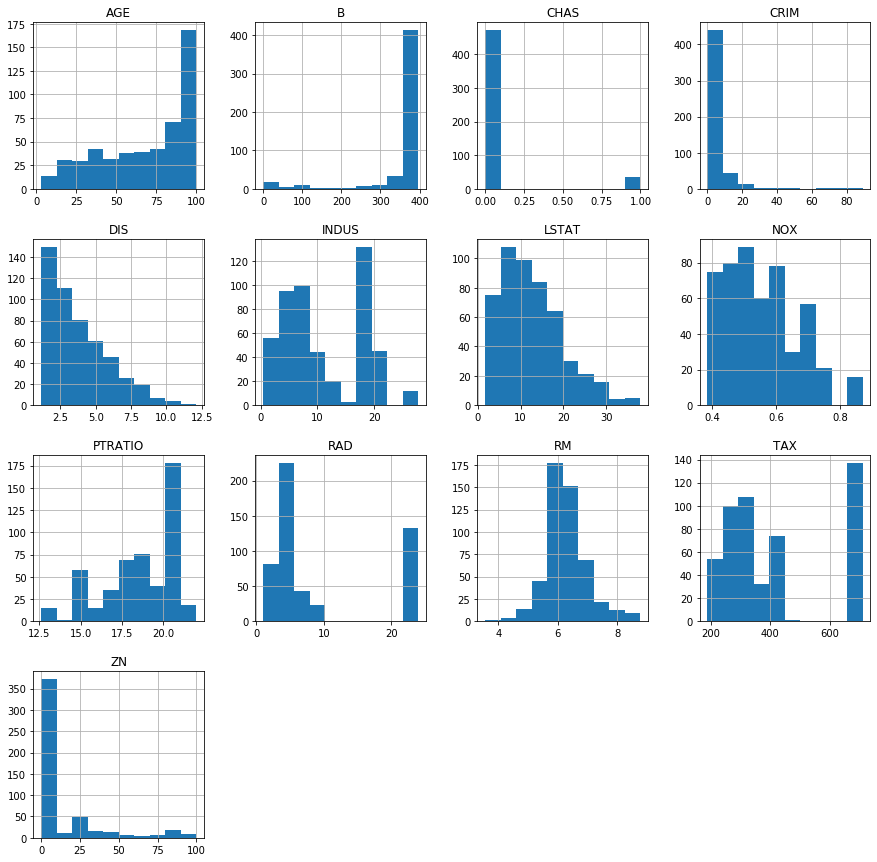

In [52]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
attributes_df.hist(ax=ax)
plt.show()

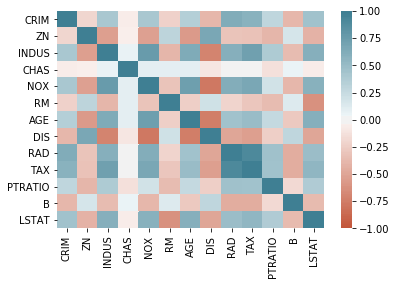

In [53]:
import seaborn as sns

corr = attributes_df.corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),)

Text(0.5, 1.0, 'Boston Housing Prices')

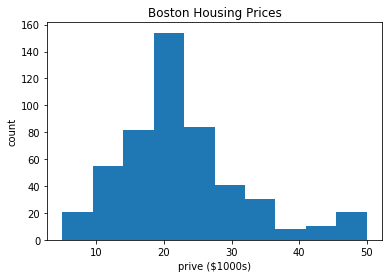

In [54]:
plt.hist(boston.target)
plt.xlabel('prive ($1000s)')
plt.ylabel('count')
plt.title('Boston Housing Prices')

So, now let's get to it.

## Regression algorithms

Again, we will define a sample for us and will see how the predicted price is going to be. Let's assume, I have a really good house...


In [0]:
my_house = [[0, 98, 5, 1, 0.01, 8.5, 50, 2, 2, 310, 15, 380, 3]]

In [0]:
X = boston.data
y = boston.target

### Ordinary Least square

Without regularization.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

ols = LinearRegression()
ols.fit(X_train, y_train)

y_pred = ols.predict(X_test)

print("R^2: {}".format(ols.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6844267283527068
Root Mean Squared Error: 4.700924890603808


Let's see how our regression peforms for known value graphically.

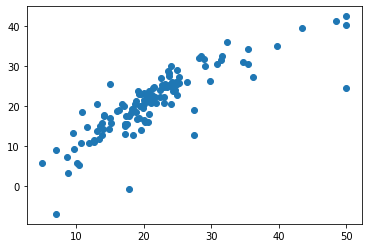

In [61]:
plt.scatter(y_test, y_pred)

There are some points not too close to the line. But at least the line can be recognized.

We can also see this for the whole dataset.

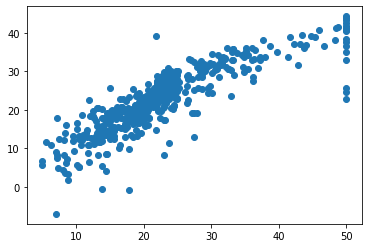

In [62]:
plt.scatter(y, ols.predict(X))

Perform cross validation:


In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ols, X, y, cv=5)

print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-Fold CV Score: 0.35327592439588484


What about my house?

My house [56.49774801] vs. max house 50.0


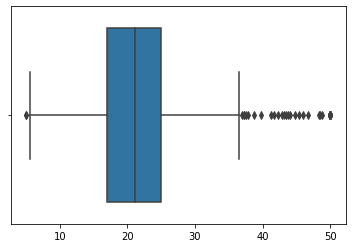

In [57]:
print('My house', ols.predict(my_house), 'vs. max house', max(boston.target))

sns.boxplot(x=boston.target)

Seems like I really have the best house in town!

### Lasso regression


[-0.07919713  0.04958654 -0.          0.         -0.          2.19364105
  0.00697176 -0.87904189  0.27595369 -0.01552132 -0.75193465  0.00923502
 -0.67748123]


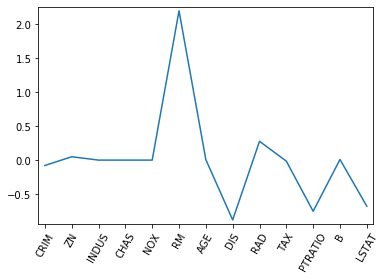

In [66]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.59948)

lasso.fit(X, y)

lasso_coef = lasso.coef_
print(lasso_coef)

plt.plot(range(len(boston.feature_names)), lasso_coef)
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60)
plt.margins(0.02)
plt.show()

Let's predict my house again:

In [65]:
print('My house', lasso.predict(my_house), 'vs. max house', max(boston.target))

My house [42.21812285] vs. max house 50.0


Well, it is still below my expectations. But compared to my initial alpha value, it's way better.

### Ridge Regressions

Like in the lesson.

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-2, 0, 10)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

Display like in the lesson:

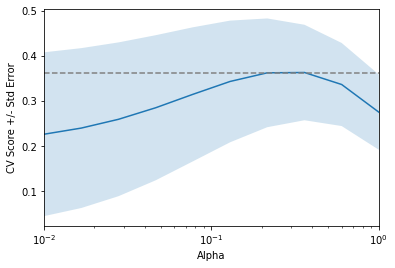

In [41]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

display_plot(ridge_scores, ridge_scores_std)

Let's predict my house again:

In [59]:
ridge.alpha = 0.5
ridge.fit(X, y)
print('My house', ridge.predict(my_house), 'vs. max house', max(boston.target))

My house [44.69094716] vs. max house 50.0


So, it is still more than okay-ish. But I guess I have overestimated my house a bit when setting up the values.